# Univariate Analysis (non graphical)

In [3]:
import pandas as pd 

df=pd.read_csv("dataset/AB_NYC_2019.csv")

In [4]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [8]:
df["id"]=df["id"].astype("str")
df["host_id"]=df["host_id"].astype("str")

In [11]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df.nunique()

id                                38821
name                              38244
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## **categorical**

In [14]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [16]:
df["neighbourhood_group"].value_counts(normalize=True) # gives in percentage

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [18]:
df["room_type"].value_counts(normalize=True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

## **Numerical**

In [19]:
df["price"].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [23]:
bins=(0,200,500,1000,2000,100000)

In [24]:
df["price"].value_counts(bins=bins)

(-0.001, 200.0]       32932
(200.0, 500.0]         5267
(500.0, 1000.0]         515
(1000.0, 2000.0]         72
(2000.0, 100000.0]       35
Name: count, dtype: int64

In [25]:
df["price"].mean()

142.33252621004095

In [26]:
df["price"].std()

196.99475591833985

In [27]:
df["price"].skew()

23.673594295123014

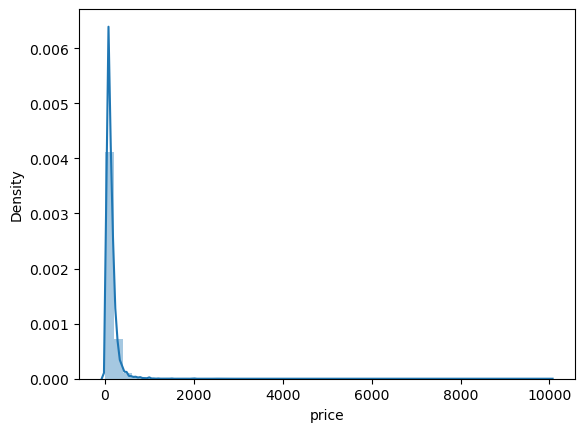

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

sns.distplot(df["price"])
plt.show()

In [28]:
df["price"].kurt()

953.4807356344944

In [45]:
df.corr(numeric_only=True)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.088259,0.031344,0.024893,-0.008559,-0.010117,0.004340,-0.021921
longitude,0.088259,1.000000,-0.155298,-0.055414,0.054746,0.146228,-0.093348,0.102573
price,0.031344,-0.155298,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.024893,-0.055414,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.008559,0.054746,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.004340,-0.093348,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,-0.021921,0.102573,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


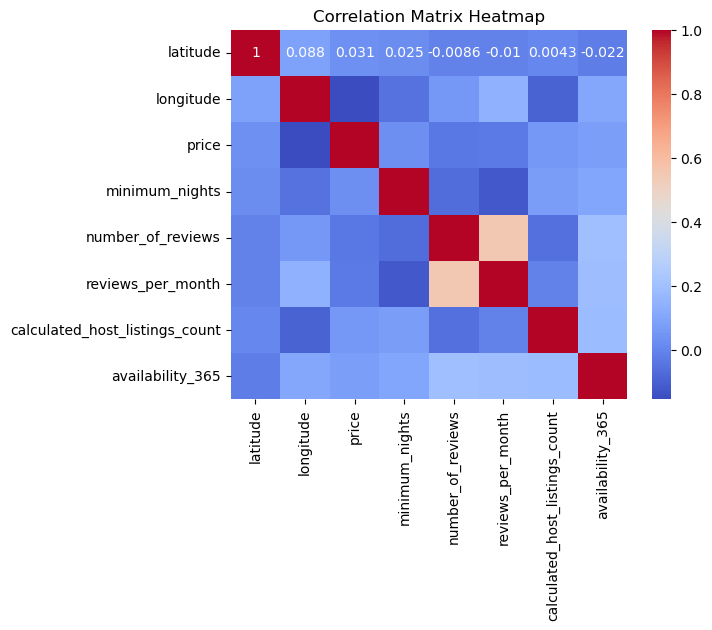

In [49]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Bar graph**

<Axes: xlabel='neighbourhood_group', ylabel='count'>

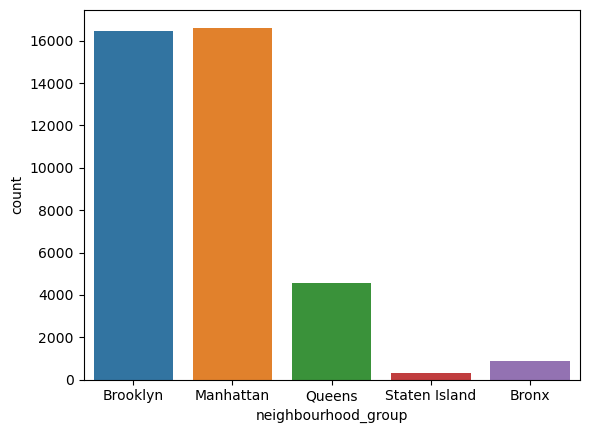

In [52]:
sns.countplot(data=df,x="neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

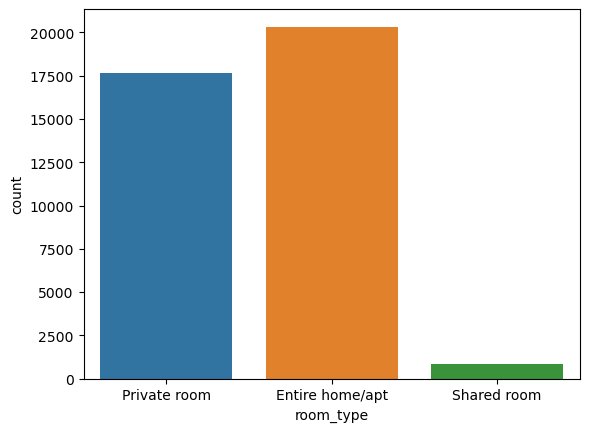

In [53]:
sns.countplot(x=df["room_type"])

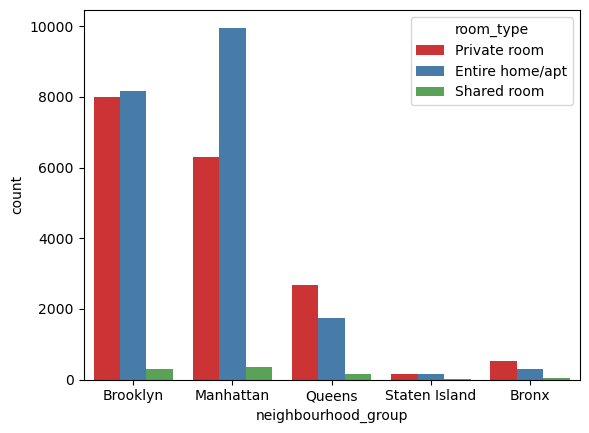

In [59]:
sns.countplot(data=df, hue="room_type", x="neighbourhood_group", palette="Set1")
plt.show()

## **Pie**

<Axes: ylabel='count'>

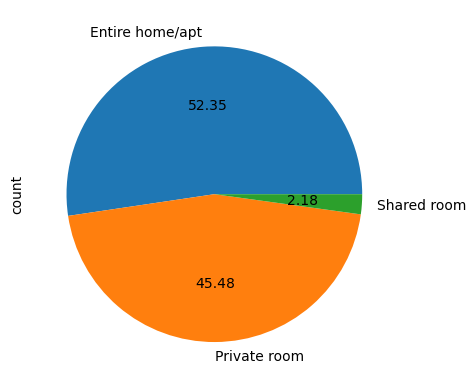

In [68]:
df.room_type.value_counts().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='count'>

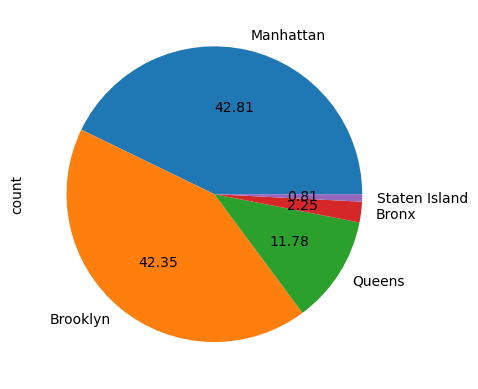

In [67]:
df.neighbourhood_group.value_counts().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='neighbourhood_group'>

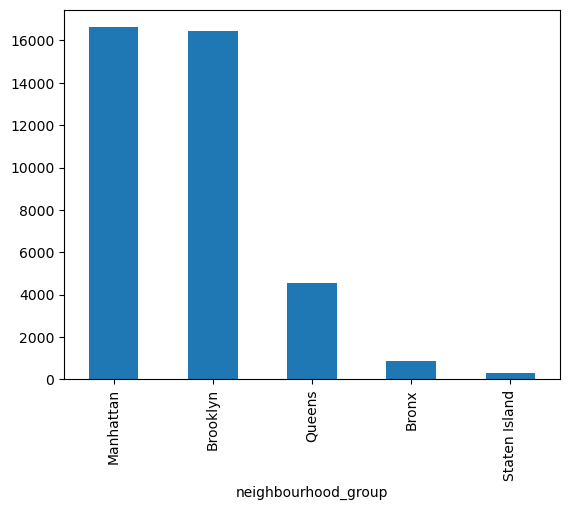

In [70]:
df.neighbourhood_group.value_counts().plot(kind="bar")

In [71]:
df2=sns.load_dataset("titanic")

In [73]:
df2.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='count'>

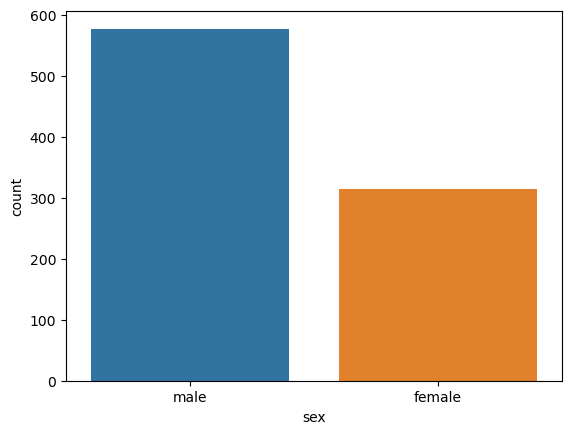

In [76]:
sns.countplot(data=df2,x="sex")

<Axes: >

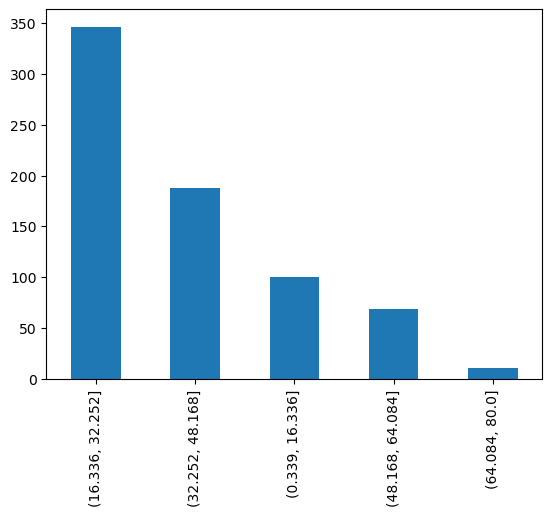

In [84]:
df2["age"].value_counts(bins=5).plot(kind="bar")

<Axes: xlabel='survived', ylabel='count'>

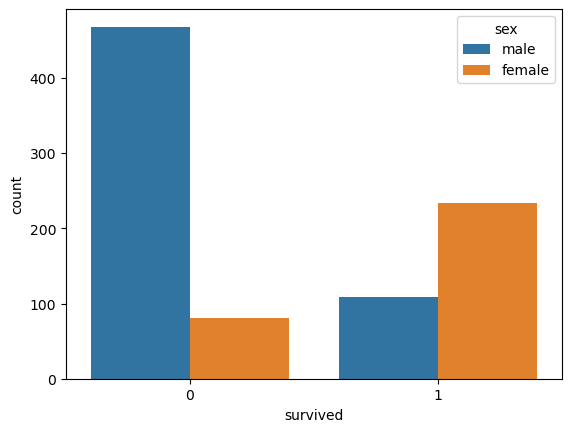

In [85]:
sns.countplot(data=df2,x="survived",hue="sex")